In [133]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [134]:
!ls /content/drive/My\ Drive/Colab\ Notebooks

 BAoAI#HW1.ipynb
'#class3.ipynb'
 Lecture2_coding.ipynb
 literary_birth_rate.csv
 sales.csv
'sfo cust sat 2014 data file_WEIGHTED_flysfo.xlsx'
'sfo cust sat 2015_data file_final_WEIGHTED_flysfo.csv'
 ToyotaCorolla.csv
 Untitled0.ipynb
 user_device.csv
 user_usage.csv


In [135]:
import os
os.chdir('/content/drive/My Drive/Colab Notebooks')
print(os.getcwd())

/content/drive/My Drive/Colab Notebooks


In [136]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings 
warnings.filterwarnings("ignore")

Importing Keras Libraries and Packages

In [137]:
import keras
from keras.models import Sequential
from keras.layers import Dense
import seaborn 
import seaborn as sns # visualization

To control the Randomness following packages has been imported


In [138]:
from numpy.random import seed
seed(1)
from tensorflow import random
random.set_seed(20)

Importing the dataset


In [139]:
toyota= pd.read_csv('ToyotaCorolla.csv')
toyota

,Id,Model,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,Fuel_Type,HP,Met_Color,Color,Automatic,CC,Doors,Cylinders,Gears,Quarterly_Tax,Weight,Mfr_Guarantee,BOVAG_Guarantee,Guarantee_Period,ABS,Airbag_1,Airbag_2,Airco,Automatic_airco,Boardcomputer,CD_Player,Central_Lock,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Parking_Assistant,Tow_Bar
0,1,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13500,23,10,2002,46986,Diesel,90,1,Blue,0,2000,3,4,5,210,1165,0,1,3,1,1,1,0,0,1,0,1,1,1,0,0,0,1,0,0,0,0
1,2,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13750,23,10,2002,72937,Diesel,90,1,Silver,0,2000,3,4,5,210,1165,0,1,3,1,1,1,1,0,1,1,1,0,1,0,0,0,1,0,0,0,0
2,3,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13950,24,9,2002,41711,Diesel,90,1,Blue,0,2000,3,4,5,210,1165,1,1,3,1,1,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0
3,4,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,14950,26,7,2002,48000,Diesel,90,0,Black,0,2000,3,4,5,210,1165,1,1,3,1,1,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0
4,5,TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors,13750,30,3,2002,38500,Diesel,90,0,Black,0,2000,3,4,5,210,1170,1,1,3,1,1,1,1,0,1,0,1,1,1,0,1,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1431,1438,TOYOTA Corolla 1.3 16V HATCHB G6 2/3-Doors,7500,69,12,1998,20544,Petrol,86,1,Blue,0,1300,3,4,5,69,1025,1,1,3,1,1,1,1,0,0,0,1,1,1,0,1,1,1,0,0,0,0
1432,1439,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,10845,72,9,1998,19000,Petrol,86,0,Grey,0,1300,3,4,5,69,1015,0,1,3,1,1,1,0,0,0,0,0,0,1,0,0,1,1,0,0,0,0
1433,1440,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,8500,71,10,1998,17016,Petrol,86,0,Blue,0,1300,3,4,5,69,1015,0,1,3,0,1,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0
1434,1441,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,7250,70,11,1998,16916,Petrol,86,1,Grey,0,1300,3,4,5,69,1015,1,1,3,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0


In [140]:
# Viewing the columns present in the dataset
toyota.columns

Index(['Id', 'Model', 'Price', 'Age_08_04', 'Mfg_Month', 'Mfg_Year', 'KM',
       'Fuel_Type', 'HP', 'Met_Color', 'Color', 'Automatic', 'CC', 'Doors',
       'Cylinders', 'Gears', 'Quarterly_Tax', 'Weight', 'Mfr_Guarantee',
       'BOVAG_Guarantee', 'Guarantee_Period', 'ABS', 'Airbag_1', 'Airbag_2',
       'Airco', 'Automatic_airco', 'Boardcomputer', 'CD_Player',
       'Central_Lock', 'Powered_Windows', 'Power_Steering', 'Radio',
       'Mistlamps', 'Sport_Model', 'Backseat_Divider', 'Metallic_Rim',
       'Radio_cassette', 'Parking_Assistant', 'Tow_Bar'],
      dtype='object')

In [141]:
# Data types
toyota.dtypes

Id                    int64
Model                object
Price                 int64
Age_08_04             int64
Mfg_Month             int64
Mfg_Year              int64
KM                    int64
Fuel_Type            object
HP                    int64
Met_Color             int64
Color                object
Automatic             int64
CC                    int64
Doors                 int64
Cylinders             int64
Gears                 int64
Quarterly_Tax         int64
Weight                int64
Mfr_Guarantee         int64
BOVAG_Guarantee       int64
Guarantee_Period      int64
ABS                   int64
Airbag_1              int64
Airbag_2              int64
Airco                 int64
Automatic_airco       int64
Boardcomputer         int64
CD_Player             int64
Central_Lock          int64
Powered_Windows       int64
Power_Steering        int64
Radio                 int64
Mistlamps             int64
Sport_Model           int64
Backseat_Divider      int64
Metallic_Rim        

In [142]:
print('Number of Rows and Columns in toyota dataset is= {}'.format(toyota.shape))

Number of Rows and Columns in toyota dataset is= (1436, 39)


In [143]:
# General Information regarding the dataset
toyota.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 39 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Id                 1436 non-null   int64 
 1   Model              1436 non-null   object
 2   Price              1436 non-null   int64 
 3   Age_08_04          1436 non-null   int64 
 4   Mfg_Month          1436 non-null   int64 
 5   Mfg_Year           1436 non-null   int64 
 6   KM                 1436 non-null   int64 
 7   Fuel_Type          1436 non-null   object
 8   HP                 1436 non-null   int64 
 9   Met_Color          1436 non-null   int64 
 10  Color              1436 non-null   object
 11  Automatic          1436 non-null   int64 
 12  CC                 1436 non-null   int64 
 13  Doors              1436 non-null   int64 
 14  Cylinders          1436 non-null   int64 
 15  Gears              1436 non-null   int64 
 16  Quarterly_Tax      1436 non-null   int64 


In [144]:
print(toyota.describe())

                Id         Price  ...  Parking_Assistant      Tow_Bar
count  1436.000000   1436.000000  ...        1436.000000  1436.000000
mean    721.555014  10730.824513  ...           0.002786     0.277855
std     416.476890   3626.964585  ...           0.052723     0.448098
min       1.000000   4350.000000  ...           0.000000     0.000000
25%     361.750000   8450.000000  ...           0.000000     0.000000
50%     721.500000   9900.000000  ...           0.000000     0.000000
75%    1081.250000  11950.000000  ...           0.000000     1.000000
max    1442.000000  32500.000000  ...           1.000000     1.000000

[8 rows x 36 columns]


In [145]:
#Summarizes String columns
print(toyota.describe(include=['object']))

                                                    Model Fuel_Type Color
count                                                1436      1436  1436
unique                                                319         3    10
top     TOYOTA Corolla 1.6 16V HATCHB LINEA TERRA 2/3-...    Petrol  Grey
freq                                                  109      1264   301


In [146]:
print('Number of missing values {}'.format(toyota.isnull().sum()))

Number of missing values Id                   0
Model                0
Price                0
Age_08_04            0
Mfg_Month            0
Mfg_Year             0
KM                   0
Fuel_Type            0
HP                   0
Met_Color            0
Color                0
Automatic            0
CC                   0
Doors                0
Cylinders            0
Gears                0
Quarterly_Tax        0
Weight               0
Mfr_Guarantee        0
BOVAG_Guarantee      0
Guarantee_Period     0
ABS                  0
Airbag_1             0
Airbag_2             0
Airco                0
Automatic_airco      0
Boardcomputer        0
CD_Player            0
Central_Lock         0
Powered_Windows      0
Power_Steering       0
Radio                0
Mistlamps            0
Sport_Model          0
Backseat_Divider     0
Metallic_Rim         0
Radio_cassette       0
Parking_Assistant    0
Tow_Bar              0
dtype: int64


In [147]:
print(toyota.corr())

                         Id     Price  ...  Parking_Assistant   Tow_Bar
Id                 1.000000 -0.738250  ...          -0.049103  0.159171
Price             -0.738250  1.000000  ...           0.044375 -0.172369
Age_08_04          0.906132 -0.876590  ...          -0.048172  0.188720
Mfg_Month          0.043742 -0.018138  ...           0.007113 -0.042170
Mfg_Year          -0.919523  0.885159  ...           0.047171 -0.182206
KM                 0.273298 -0.569960  ...          -0.064318  0.084153
HP                -0.109375  0.314990  ...           0.029990  0.068271
Met_Color         -0.079713  0.108905  ...           0.036691  0.148536
Automatic          0.066265  0.033081  ...           0.159985  0.018786
CC                -0.117704  0.126389  ...           0.002883  0.002725
Doors             -0.130207  0.185326  ...           0.025893  0.102292
Cylinders               NaN       NaN  ...                NaN       NaN
Gears             -0.043343  0.063104  ...          -0.007422 -0

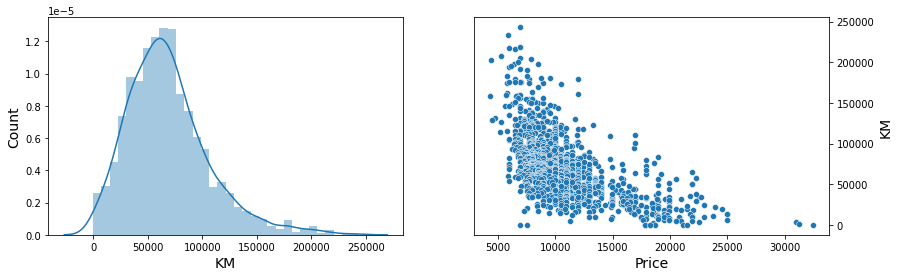

In [148]:
f, axes = plt.subplots(1,2,figsize=(14,4))

sns.distplot(toyota['KM'], ax = axes[0])
axes[0].set_xlabel('KM', fontsize=14)
axes[0].set_ylabel('Count', fontsize=14)
axes[0].yaxis.tick_left()

sns.scatterplot(x = 'Price', y = 'KM', data = toyota, ax = axes[1])
axes[1].set_xlabel('Price', fontsize=14)
axes[1].set_ylabel('KM', fontsize=14)
axes[1].yaxis.set_label_position("right")
axes[1].yaxis.tick_right()

plt.show()

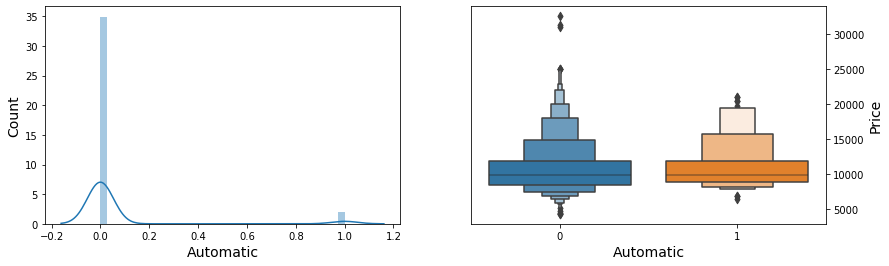

In [149]:
f, axes = plt.subplots(1,2,figsize=(14,4))

sns.distplot(toyota['Automatic'], ax = axes[0])
axes[0].set_xlabel('Automatic', fontsize=14)
axes[0].set_ylabel('Count', fontsize=14)
axes[0].yaxis.tick_left()

sns.boxenplot(x = 'Automatic', y = 'Price', data = toyota, ax = axes[1])
axes[1].set_xlabel('Automatic', fontsize=14)
axes[1].set_ylabel('Price', fontsize=14)
axes[1].yaxis.set_label_position("right")
axes[1].yaxis.tick_right()

plt.show()

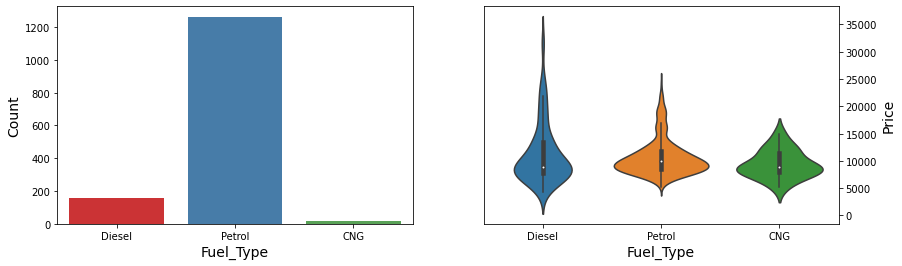

In [150]:
from collections import Counter

fuel_list= Counter(toyota['Fuel_Type'])
labels = fuel_list.keys()
sizes = fuel_list.values()

f, axes = plt.subplots(1,2,figsize=(14,4))

sns.countplot(toyota['Fuel_Type'], ax = axes[0], palette="Set1")
axes[0].set_xlabel('Fuel_Type', fontsize=14)
axes[0].set_ylabel('Count', fontsize=14)
axes[0].yaxis.tick_left()

sns.violinplot(x = 'Fuel_Type', y = 'Price', data = toyota, ax = axes[1])
axes[1].set_xlabel('Fuel_Type', fontsize=14)
axes[1].set_ylabel('Price', fontsize=14)
axes[1].yaxis.set_label_position("right")
axes[1].yaxis.tick_right()

plt.show()

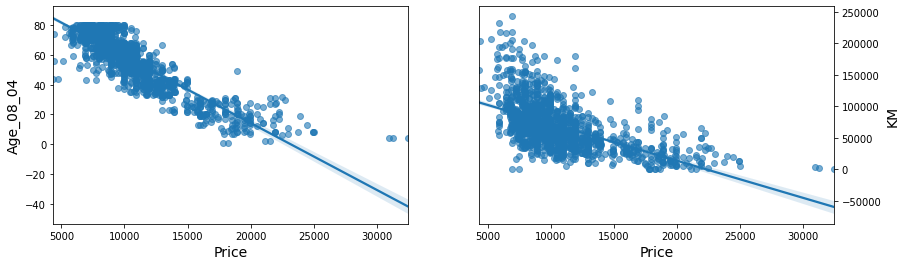

In [151]:
f, axes = plt.subplots(1, 2, figsize=(14,4))

sns.regplot(x = 'Price', y = 'Age_08_04', data = toyota, scatter_kws={'alpha':0.6}, ax = axes[0])
axes[0].set_xlabel('Price', fontsize=14)
axes[0].set_ylabel('Age_08_04', fontsize=14)
axes[0].yaxis.tick_left()

sns.regplot(x = 'Price', y = 'KM', data = toyota, scatter_kws={'alpha':0.6}, ax = axes[1])
axes[1].set_xlabel('Price', fontsize=14)
axes[1].set_ylabel('KM', fontsize=14)
axes[1].yaxis.set_label_position("right")
axes[1].yaxis.tick_right()



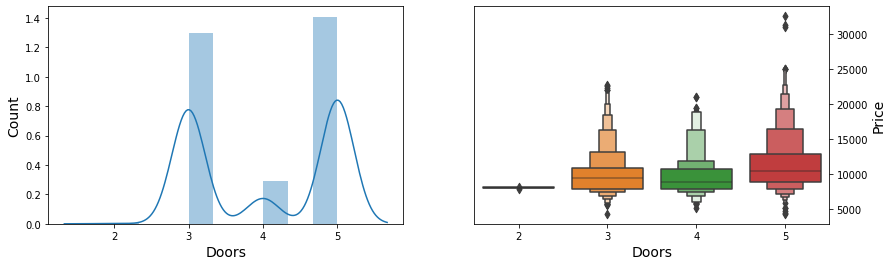

In [152]:
f, axes = plt.subplots(1,2,figsize=(14,4))

sns.distplot(toyota['Doors'], ax = axes[0])
axes[0].set_xlabel('Doors', fontsize=14)
axes[0].set_ylabel('Count', fontsize=14)
axes[0].yaxis.tick_left()

sns.boxenplot(x = 'Doors', y = 'Price', data = toyota, ax = axes[1])
axes[1].set_xlabel('Doors', fontsize=14)
axes[1].set_ylabel('Price', fontsize=14)
axes[1].yaxis.set_label_position("right")
axes[1].yaxis.tick_right()

plt.show()

#Changing pandas dataframe to numpy array
In python module will make two arrays X and y. X contains features and y will contain classes.

Use predictors Age_08_04, KM, Fuel_Type, HP, Automatic, Doors, Quarterly_Tax, Mfr_Guarantee, Guarantee_Period, Airco, Automatic_airco, CD_Player, Powered_Windows, Sport_Model, and Tow_Bar, and transfer them all to a NumPy Array X
Price in the Y array




In [153]:
X = toyota.loc[:,['Age_08_04', 'KM','Fuel_Type', 'HP', 'Automatic','Doors', 'Quarterly_Tax','Mfr_Guarantee',
                'Guarantee_Period','Airco', 'Automatic_airco','CD_Player', 'Powered_Windows','Sport_Model', 
                'Tow_Bar']].values
X

array([[23, 46986, 'Diesel', ..., 1, 0, 0],
       [23, 72937, 'Diesel', ..., 0, 0, 0],
       [24, 41711, 'Diesel', ..., 0, 0, 0],
       ...,
       [71, 17016, 'Petrol', ..., 0, 0, 0],
       [70, 16916, 'Petrol', ..., 0, 0, 0],
       [76, 1, 'Petrol', ..., 0, 0, 0]], dtype=object)

Transfer Price data for predicting into the Y 

In [154]:
Y = toyota.iloc[:, 2].values
Y

array([13500, 13750, 13950, ...,  8500,  7250,  6950])

# Encoding Categorical Data

a.  One-hot Encoding: to produce dummies in different columns

# Following are different ways to create dummy variables for Fuel Types as a categorical variable 

# 1st way with get_dummies


In [155]:
# First way: 
# Encoding fuel_type using get_dummies

# Creating a set of dummy variables from the Fuel variable
# for new dummy columns using the prefix of 'Fuel_Type'
toyota_dummy = pd.get_dummies(toyota['Fuel_Type'],prefix='Fuel_Type')

# Joining the dummy variables to the main dataframe
toyota_new_1 = pd.concat([toyota, toyota_dummy], axis=1)
toyota_new_1.head()

,Id,Model,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,Fuel_Type,HP,Met_Color,Color,Automatic,CC,Doors,Cylinders,Gears,Quarterly_Tax,Weight,Mfr_Guarantee,BOVAG_Guarantee,Guarantee_Period,ABS,Airbag_1,Airbag_2,Airco,Automatic_airco,Boardcomputer,CD_Player,Central_Lock,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Parking_Assistant,Tow_Bar,Fuel_Type_CNG,Fuel_Type_Diesel,Fuel_Type_Petrol
0,1,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13500,23,10,2002,46986,Diesel,90,1,Blue,0,2000,3,4,5,210,1165,0,1,3,1,1,1,0,0,1,0,1,1,1,0,0,0,1,0,0,0,0,0,1,0
1,2,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13750,23,10,2002,72937,Diesel,90,1,Silver,0,2000,3,4,5,210,1165,0,1,3,1,1,1,1,0,1,1,1,0,1,0,0,0,1,0,0,0,0,0,1,0
2,3,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13950,24,9,2002,41711,Diesel,90,1,Blue,0,2000,3,4,5,210,1165,1,1,3,1,1,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0
3,4,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,14950,26,7,2002,48000,Diesel,90,0,Black,0,2000,3,4,5,210,1165,1,1,3,1,1,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0
4,5,TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors,13750,30,3,2002,38500,Diesel,90,0,Black,0,2000,3,4,5,210,1170,1,1,3,1,1,1,1,0,1,0,1,1,1,0,1,0,1,0,0,0,0,0,1,0


# 2nd way is with category encoder

In [156]:
# Second way to create dummy varibles by using category encoder

!pip install category_encoders
import category_encoders as ce
fueltype = toyota['Fuel_Type']
fuel = ce.OneHotEncoder(cols='Fuel_Type', use_cat_names=True).fit(fueltype)
fuel.fit_transform(fueltype)


,Fuel_Type_Diesel,Fuel_Type_Petrol,Fuel_Type_CNG
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0
...,...,...,...
1431,0,1,0
1432,0,1,0
1433,0,1,0
1434,0,1,0


In [157]:
#When only one or more than one columns are encoded, the dataframe obtained as output and original dataframe are concateneted to continue further.

toyota_new_2 = pd.concat([toyota, toyota_dummy], axis=1)
toyota_new_2.head()

,Id,Model,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,Fuel_Type,HP,Met_Color,Color,Automatic,CC,Doors,Cylinders,Gears,Quarterly_Tax,Weight,Mfr_Guarantee,BOVAG_Guarantee,Guarantee_Period,ABS,Airbag_1,Airbag_2,Airco,Automatic_airco,Boardcomputer,CD_Player,Central_Lock,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Parking_Assistant,Tow_Bar,Fuel_Type_CNG,Fuel_Type_Diesel,Fuel_Type_Petrol
0,1,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13500,23,10,2002,46986,Diesel,90,1,Blue,0,2000,3,4,5,210,1165,0,1,3,1,1,1,0,0,1,0,1,1,1,0,0,0,1,0,0,0,0,0,1,0
1,2,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13750,23,10,2002,72937,Diesel,90,1,Silver,0,2000,3,4,5,210,1165,0,1,3,1,1,1,1,0,1,1,1,0,1,0,0,0,1,0,0,0,0,0,1,0
2,3,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13950,24,9,2002,41711,Diesel,90,1,Blue,0,2000,3,4,5,210,1165,1,1,3,1,1,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0
3,4,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,14950,26,7,2002,48000,Diesel,90,0,Black,0,2000,3,4,5,210,1165,1,1,3,1,1,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0
4,5,TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors,13750,30,3,2002,38500,Diesel,90,0,Black,0,2000,3,4,5,210,1170,1,1,3,1,1,1,1,0,1,0,1,1,1,0,1,0,1,0,0,0,0,0,1,0


# 3rd way is with LabelEncoder()

---

LableEncoder is the way to produce Binary to a 0–1 scale and convert categorical predictors to dummies. 

In [158]:
# 3rd way of creating dummy varible by using OneHotEncoder
# Fuel column

from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer, make_column_transformer

labelencoder_X = LabelEncoder()
X[:, 2] = labelencoder_X.fit_transform(X[:, 2])
X[0,]


array([23, 46986, 1, 90, 0, 3, 210, 0, 3, 0, 0, 0, 1, 0, 0], dtype=object)

In [159]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = None, shuffle = False)



#Feature Scaling by using MinMaxScaler rescales the data set such that all feature values are in the range [0, 1]

Another way to normalise is to use the Min Max Scaler, which changes all features to be between 0 and 1, as defined below:

X_std = (X - X.min(axis=0)) / (X.max(axis=0) - X.min(axis=0))

X_scaled = X_std * (max - min) + min


In [160]:
# Feature Scaling
from sklearn.preprocessing import MinMaxScaler

MMSX = MinMaxScaler()
MMSY = MinMaxScaler()
X_train = MMSX.fit_transform(X_train)
X_test = MMSX.transform(X_test)
Y_train = MMSY.fit_transform(Y_train.reshape(-1, 1))
Y_train = Y_train.flatten() 
Y_test = MMSY.transform(Y_test.reshape(-1, 1))
Y_test = Y_test.flatten() 

In [161]:
# ANN With One Hidden Layer With Two Nodes

# Importing the Keras libraries and packages
import keras
from keras.models import Sequential
from keras.layers import Dense

# Initialising the ANN
classifier = Sequential()

# Adding the input layer and the first hidden layer
classifier.add(Dense(units = 2, kernel_initializer = 'uniform', activation = 'relu', input_dim = 15))

# Adding the output layer
classifier.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))

# Compiling the ANN
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

# Fitting the ANN to the Training set
classifier.fit(X_train, Y_train, batch_size = 10, epochs = 20)

# Evaluate the ANN with test data
classifier.summary()

classifier.evaluate(X_test, Y_test)

Epoch 1/20
115/115 [==============================] - 1s 1ms/step - loss: 0.6818 - accuracy: 0.0023
Epoch 2/20
115/115 [==============================] - 0s 1ms/step - loss: 0.6187 - accuracy: 4.4540e-04
Epoch 3/20
115/115 [==============================] - 0s 1ms/step - loss: 0.5778 - accuracy: 3.4043e-04
Epoch 4/20
115/115 [==============================] - 0s 1ms/step - loss: 0.5684 - accuracy: 8.2973e-04
Epoch 5/20
115/115 [==============================] - 0s 1ms/step - loss: 0.5630 - accuracy: 7.5553e-04
Epoch 6/20
115/115 [==============================] - 0s 1ms/step - loss: 0.5551 - accuracy: 2.5677e-04
Epoch 7/20
115/115 [==============================] - 0s 1ms/step - loss: 0.5394 - accuracy: 0.0019
Epoch 8/20
115/115 [==============================] - 0s 1ms/step - loss: 0.5424 - accuracy: 9.3801e-05
Epoch 9/20
115/115 [==============================] - 0s 1ms/step - loss: 0.5338 - accuracy: 3.5148e-04
Epoch 10/20
115/115 [==============================] - 0s 1ms/step - los

[0.39641740918159485, 0.0]

In [162]:
# Predicting the Test and Train set results
Y_pred = classifier.predict(X_test)
Y_pred_train = classifier.predict(X_train)

# In[9]:
# Calculate Root Mean Square Error
from sklearn.metrics import mean_squared_error
from math import sqrt

rms = sqrt(mean_squared_error(Y_test, Y_pred))
print("RMS Error for Validation Data is: ", rms)

rms = sqrt(mean_squared_error(Y_train, Y_pred_train))
print("RMS Error for Training Data is: ", rms)


RMS Error for Validation Data is:  0.04395252407516263
RMS Error for Training Data is:  0.06301944529403382


In [163]:
# ANN With One Hidden Layer with 5 Nodes

# Importing the Keras libraries and packages
import keras
from keras.models import Sequential
from keras.layers import Dense

# Initialising the ANN
classifier = Sequential()

# Adding the input layer and the first hidden layer
classifier.add(Dense(units = 5, kernel_initializer = 'uniform', activation = 'relu', input_dim = 15))

# Adding the output layer
classifier.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))

# Compiling the ANN
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

# Fitting the ANN to the Training set
classifier.fit(X_train, Y_train, batch_size = 10, epochs = 20)

# Evaluate the ANN with test data
classifier.summary()

classifier.evaluate(X_test, Y_test)

Epoch 1/20
115/115 [==============================] - 1s 1ms/step - loss: 0.6762 - accuracy: 0.0023
Epoch 2/20
115/115 [==============================] - 0s 1ms/step - loss: 0.5735 - accuracy: 4.4540e-04
Epoch 3/20
115/115 [==============================] - 0s 1ms/step - loss: 0.5545 - accuracy: 3.4043e-04
Epoch 4/20
115/115 [==============================] - 0s 1ms/step - loss: 0.5420 - accuracy: 8.2973e-04
Epoch 5/20
115/115 [==============================] - 0s 1ms/step - loss: 0.5368 - accuracy: 7.5553e-04
Epoch 6/20
115/115 [==============================] - 0s 1ms/step - loss: 0.5292 - accuracy: 2.5677e-04
Epoch 7/20
115/115 [==============================] - 0s 1ms/step - loss: 0.5202 - accuracy: 0.0019
Epoch 8/20
115/115 [==============================] - 0s 1ms/step - loss: 0.5270 - accuracy: 9.3801e-05
Epoch 9/20
115/115 [==============================] - 0s 1ms/step - loss: 0.5220 - accuracy: 3.5148e-04
Epoch 10/20
115/115 [==============================] - 0s 1ms/step - los

[0.39395201206207275, 0.0]

In [164]:
# Predicting the Test and Train set results
Y_pred = classifier.predict(X_test)
Y_pred_train = classifier.predict(X_train)

# In[9]:
# Calculate Root Mean Square Error
from sklearn.metrics import mean_squared_error
from math import sqrt

rms = sqrt(mean_squared_error(Y_test, Y_pred))
print("RMS Error for Validation Data is: ", rms)

rms = sqrt(mean_squared_error(Y_train, Y_pred_train))
print("RMS Error for Training Data is: ", rms)

RMS Error for Validation Data is:  0.03483359477908263
RMS Error for Training Data is:  0.05042778547240898


In [165]:
# ANN With two Hidden Layers with 5 Nodes

# Importing the Keras libraries and packages
import keras
from keras.models import Sequential
from keras.layers import Dense

# Initialising the ANN
classifier = Sequential()

# Adding the input layer and the first hidden layer
classifier.add(Dense(units = 5, kernel_initializer = 'uniform', activation = 'relu', input_dim = 15))

#Adding the second hidden layer
classifier.add(Dense(units = 5, kernel_initializer = 'uniform', activation = 'relu'))

# Adding the output layer
classifier.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'linear'))

# Compiling the ANN
classifier.compile(optimizer = 'adam', loss = 'mse', metrics = ['mae'])

# Fitting the ANN to the Training set
classifier.fit(X_train, Y_train, batch_size = 10, epochs = 20)

# Evaluate the ANN with test data
classifier.summary()

classifier.evaluate(X_test, Y_test)

Epoch 1/20
115/115 [==============================] - 0s 1ms/step - loss: 0.0582 - mae: 0.2044
Epoch 2/20
115/115 [==============================] - 0s 1ms/step - loss: 0.0127 - mae: 0.0833
Epoch 3/20
115/115 [==============================] - 0s 1ms/step - loss: 0.0098 - mae: 0.0753
Epoch 4/20
115/115 [==============================] - 0s 1ms/step - loss: 0.0078 - mae: 0.0654
Epoch 5/20
115/115 [==============================] - 0s 1ms/step - loss: 0.0065 - mae: 0.0574
Epoch 6/20
115/115 [==============================] - 0s 1ms/step - loss: 0.0049 - mae: 0.0517
Epoch 7/20
115/115 [==============================] - 0s 1ms/step - loss: 0.0040 - mae: 0.0466
Epoch 8/20
115/115 [==============================] - 0s 1ms/step - loss: 0.0033 - mae: 0.0434
Epoch 9/20
115/115 [==============================] - 0s 1ms/step - loss: 0.0033 - mae: 0.0409
Epoch 10/20
115/115 [==============================] - 0s 1ms/step - loss: 0.0032 - mae: 0.0414
Epoch 11/20
115/115 [============================

[0.0013541653752326965, 0.030067630112171173]

In [166]:
# Predicting the Test and Train set results
Y_pred = classifier.predict(X_test)
Y_pred_train = classifier.predict(X_train)

# In[9]:
# Calculate Root Mean Square Error
from sklearn.metrics import mean_squared_error
from math import sqrt

rms = sqrt(mean_squared_error(Y_test, Y_pred))
print("RMS Error for Validation Data is: ", rms)

rms = sqrt(mean_squared_error(Y_train, Y_pred_train))
print("RMS Error for Training Data is: ", rms)

RMS Error for Validation Data is:  0.03679898489630274
RMS Error for Training Data is:  0.040914408960446444


In [172]:
# Some Manual testing


RN100 = np.array([[11,	24500,	2,	110,	0,	3,	85,	    0,	3,	1,	1,	0,	1,	1,	0]])
RN111 = np.array([[4,	   1,	1,	116,	0,	5,	283,	1,	3,	1,	1,	0,	1,	1,	0]])

price_R100  = MMSX.transform(RN100) 
price_R111  = MMSX.transform(RN111) 


predicted_RN100 = MMSY.inverse_transform(classifier.predict(price_R100))
predicted_RN111 = MMSY.inverse_transform(classifier.predict(price_R111))


print("Actual Price of Row no. 100 = $18750")
print("Predicted Price = " ,predicted_RN100 )
print("")

print("Actual Price of Row no. 111 = $32500")
print("Predicted Price = " ,predicted_RN111 )

Actual Price of Row no. 100 = $18750
Predicted Price =  [[20204.9]]

Actual Price of Row no. 111 = $32500
Predicted Price =  [[27767.45]]
